In [8]:
import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
from time_series_analysis import load_data, grid_search_arima, fit_arima_model
# Load the data
data = load_data("../data/cleaned_stock_data.csv")


/Users/jinikho/Documents/GitHub/stock-market-analysis/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jinikho/Documents/GitHub/stock-market-analysis/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jinikho/Documents/GitHub/stock-market-analysis/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jinikho/Documents/GitHub/stock-market-analysis/venv/lib/python3.12/site-packages/statsmodels/tsa/ba

Best ARIMA Order: (2, 2, 3) with AIC: 4807.612679371232


/Users/jinikho/Documents/GitHub/stock-market-analysis/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jinikho/Documents/GitHub/stock-market-analysis/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jinikho/Documents/GitHub/stock-market-analysis/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jinikho/Documents/GitHub/stock-market-analysis/venv/lib/python3.12/site-packages/statsmodels/tsa/ba

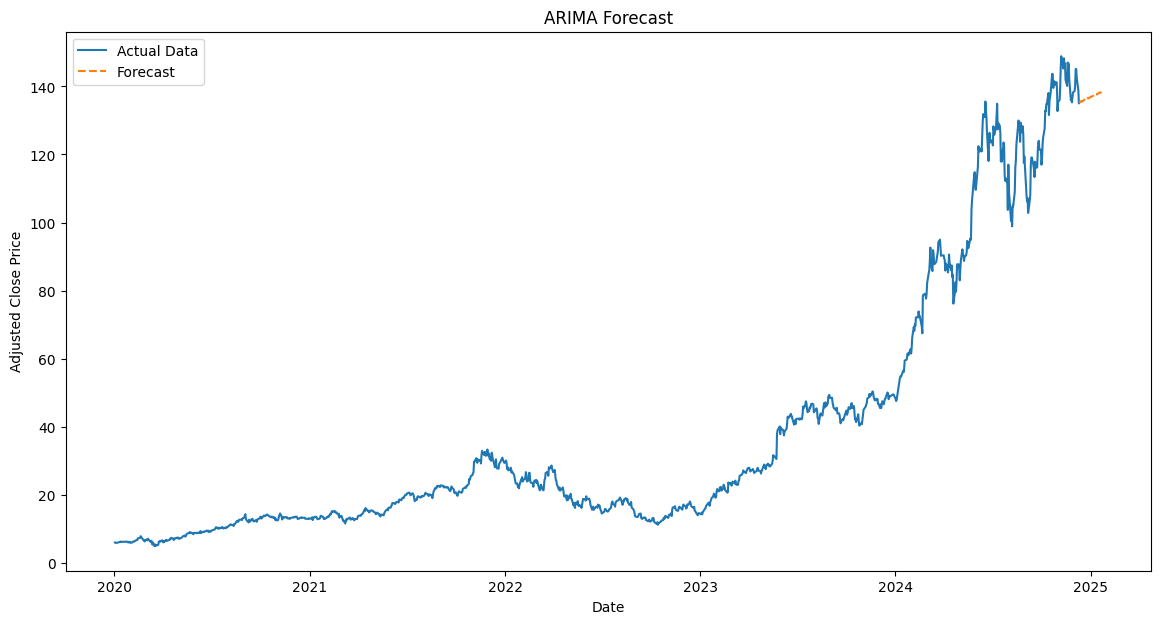

In [9]:


# Define ARIMA ranges
p_range = range(0, 4)
d_range = range(0, 3)
q_range = range(0, 4)

# Find best ARIMA parameters
best_order, _ = grid_search_arima(data, p_range, d_range, q_range)

# Fit the model and forecast
_, forecast_index, forecast_values = fit_arima_model(data, best_order)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(data.index, data, label="Actual Data")
plt.plot(forecast_index, forecast_values, label="Forecast", linestyle="--")
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()